**Использование алгоритмов машинного обучения для предсказания потребности в медицинских услугах в различных регионах**

Столбцы :

возраст: возраст основного выгодоприобретателя

пол: пол страхового агента, женщина, мужчина

имт: индекс массы тела, дающий представление о теле, относительно высоком или низком весе по отношению к росту, объективный индекс массы тела (кг/ м ^ 2), использующий отношение роста к весу, в идеале от 18,5 до 24,9

дети: Количество детей, охваченных медицинской страховкой / Количество иждивенцев

курильщик: Курение

регион: район проживания получателя в США, северо-восток, юго-восток, юго-запад, северо-запад.

расходы: Индивидуальные медицинские расходы, оплачиваемые медицинской страховкой

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm


**Импорт персонального набора данных о медицинских расходах**

In [2]:
df = pd.read_csv('/kaggle/input/insurance-csv/insurance.csv')

**Отображение столбцов в наборе данных**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Определение типа набора данных**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Выяснение того, сколько значений не являются нулевыми**

In [5]:
df.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

**Заменив значения в столбцах "Курильщик" и "Пол" на 0 и 1 для удобства**

In [6]:
df.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df.sex.replace(('female', 'male'), (1, 0), inplace=True)

**Описание набора данных**




Показаны различные средние значения, медианы, стандартное отклонение, минимальные, Квартиль 1, квартиль 3 и максимальные значения

In [7]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


**Парный график набора данных**

Отображение различных соотношений различных столбцов, сгруппированных по количеству дочерних элементов

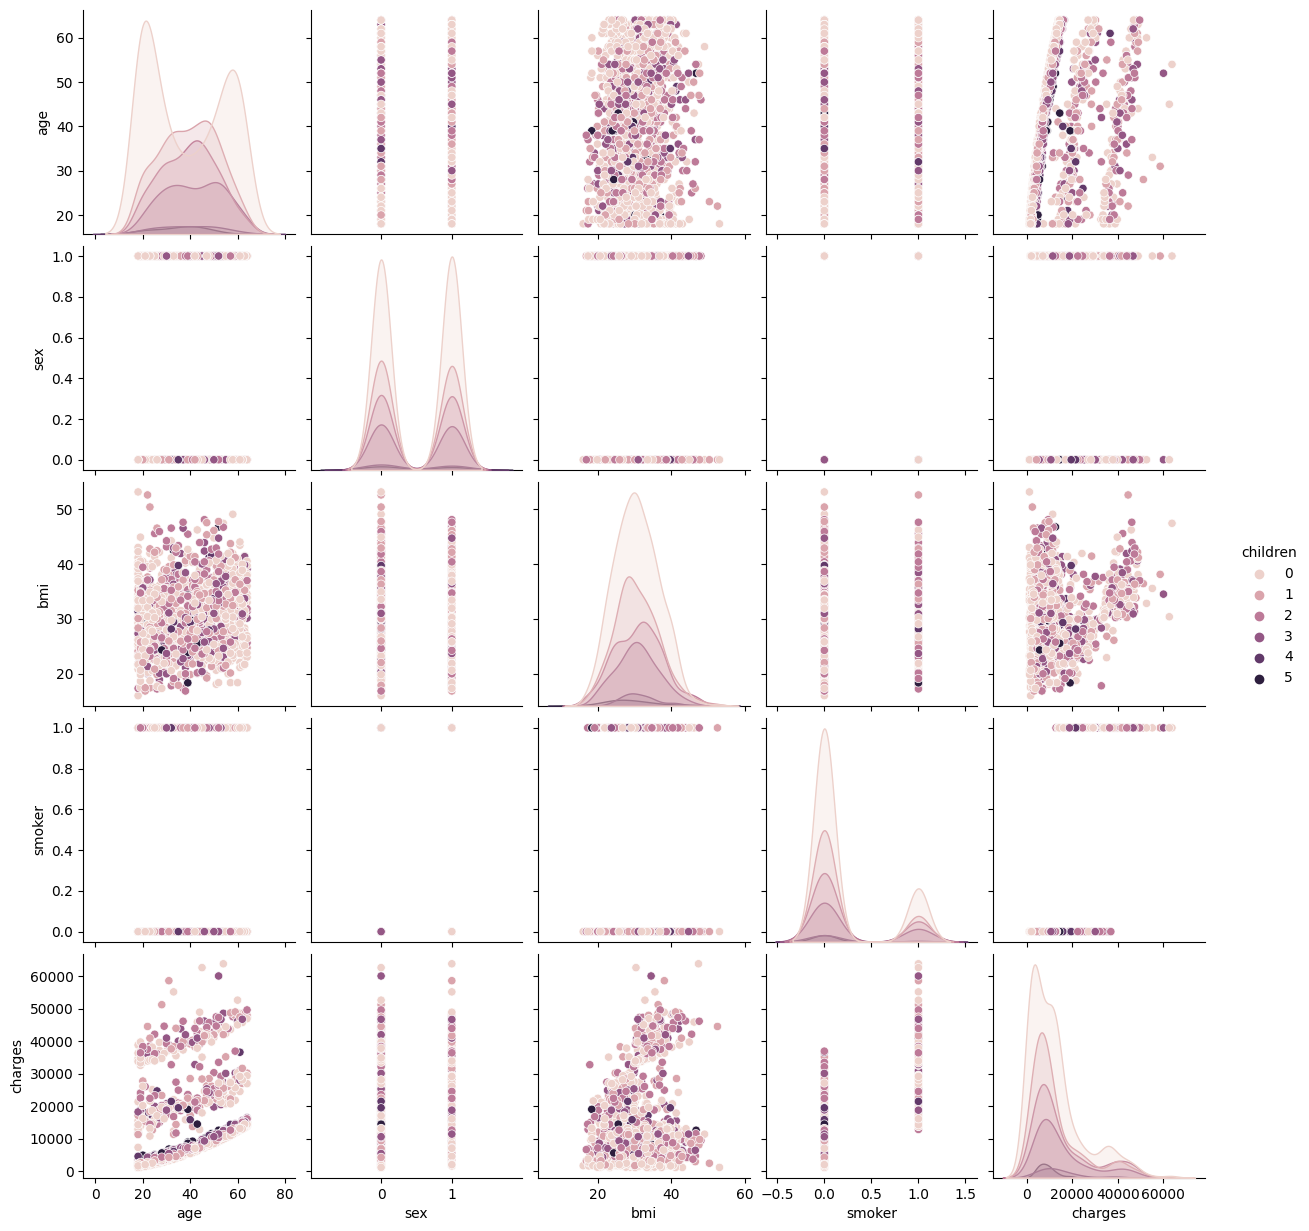

In [8]:
sb.pairplot(df,hue='children')

**Гистограмма, показывающая количество курильщиков по регионам в каждом регионе**

Показан Юго-восточный регион с наибольшим числом курильщиков, за которым следуют северо-восток и юго-запад

Text(0.5, 1.0, 'Region wise smokers count')

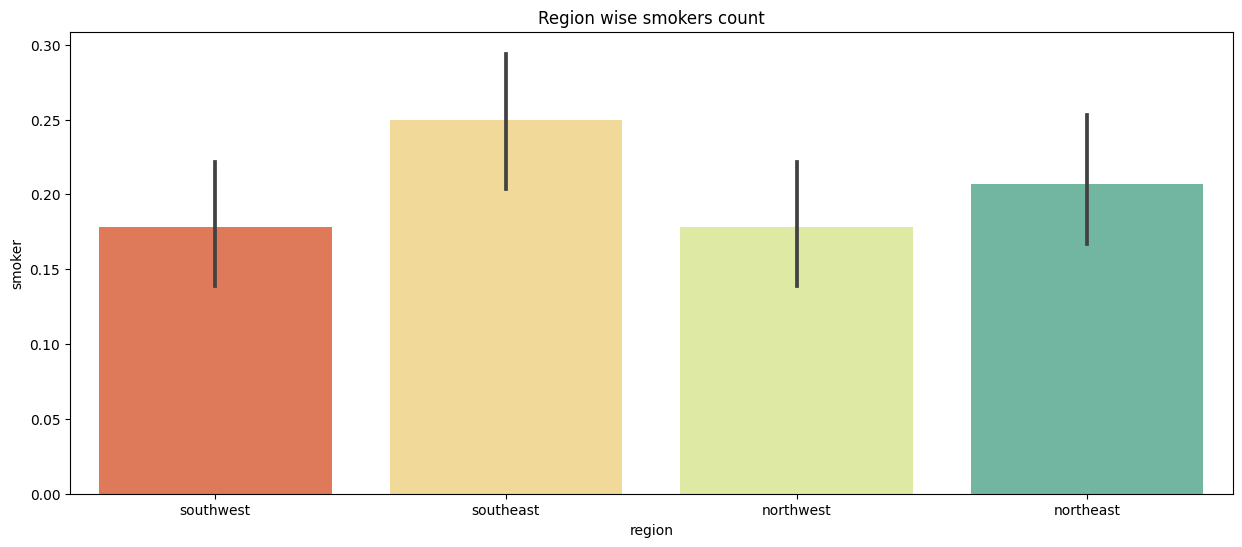

In [9]:
ax= plt.figure(figsize=(15,6))
sb.barplot(x='region', y='smoker', data=df, palette='Spectral' )
plt.title('Region wise smokers count')

**Показано распределение числа детей пациентов**

Text(0.5, 1.0, 'Showing the distribution of number of children of the patients')

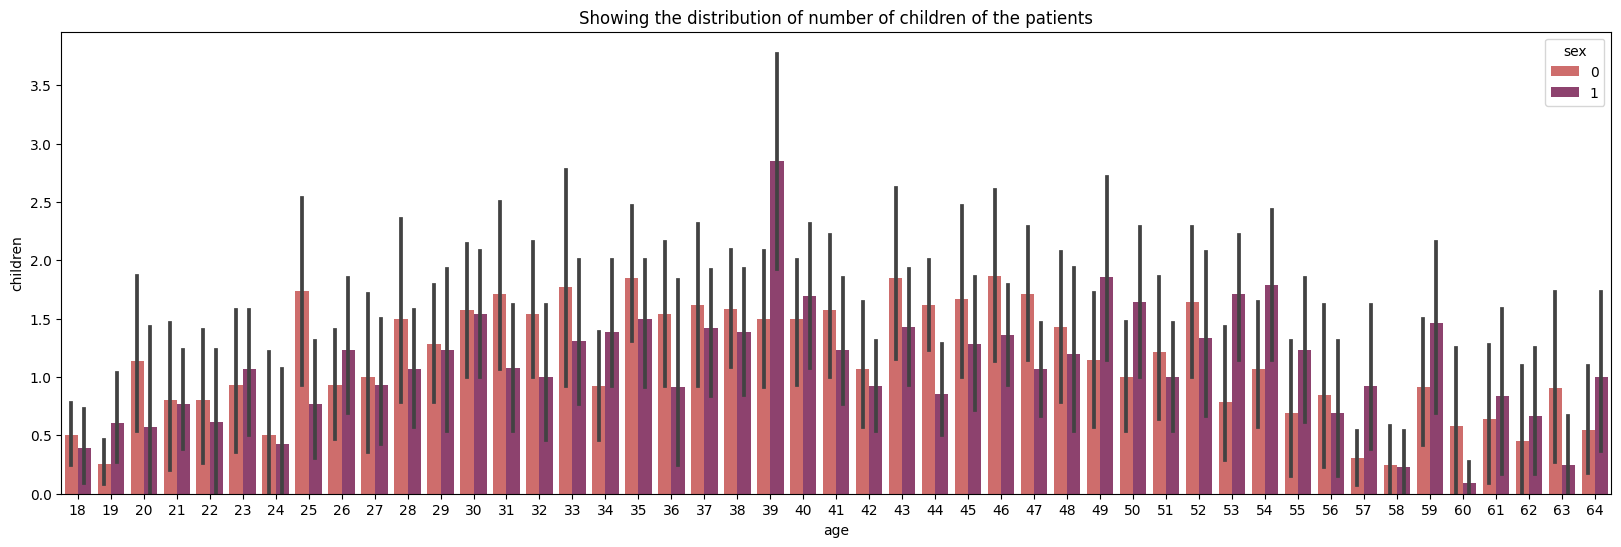

In [10]:
ax= plt.figure(figsize=(20,6))
sb.barplot(x='age', y='children', data=df, palette='flare', hue='sex' )
plt.title('Showing the distribution of number of children of the patients')

**Отображение соответствия медицинского счета возрасту**

Text(0.5, 1.0, 'Responsiveness of the medical bill to age')

<Figure size 600x600 with 0 Axes>

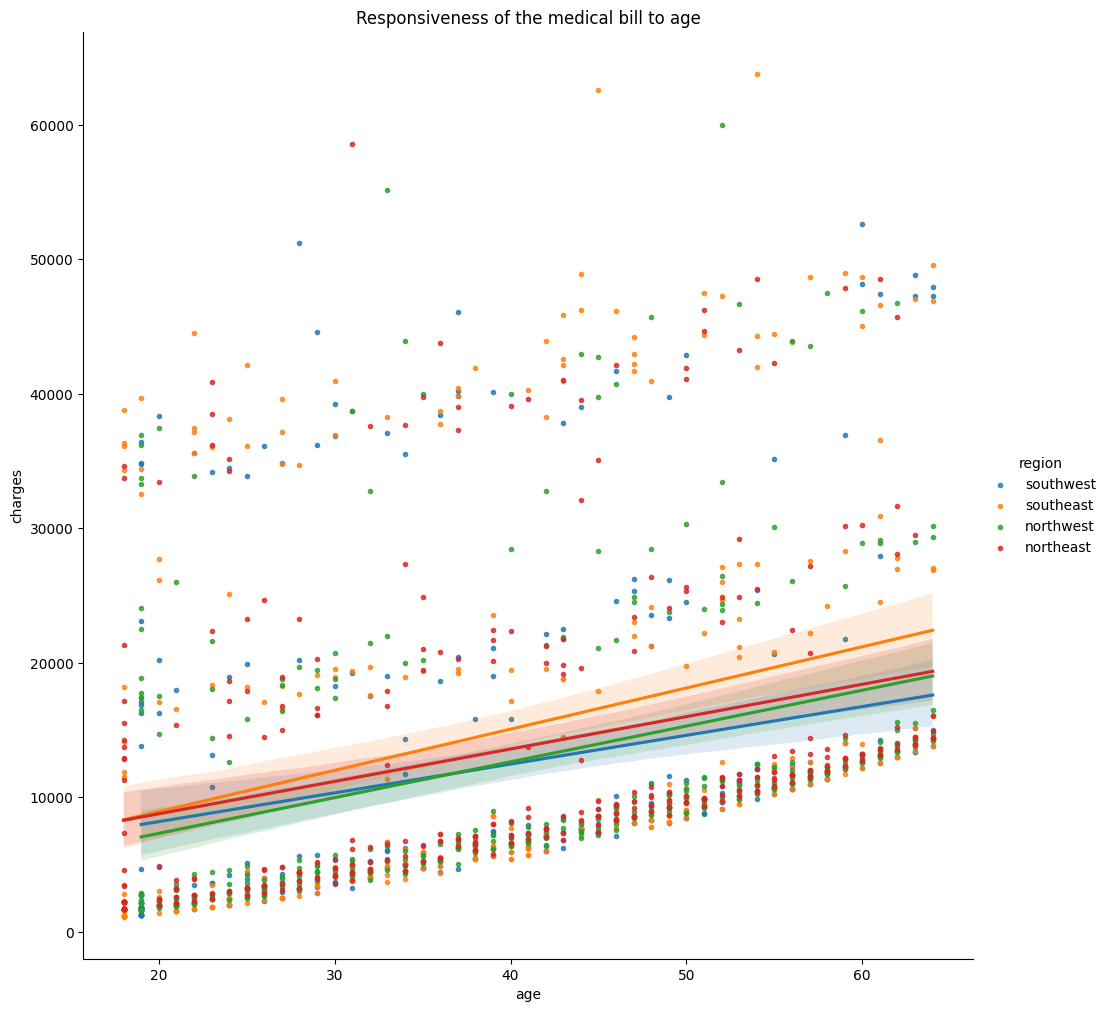

In [11]:
ax= plt.figure(figsize=(6,6))
sb.lmplot(x='age', y= 'charges',data=df,markers='.',hue ='region',height=10,aspect=1)
plt.title('Responsiveness of the medical bill to age')

**Отображение распределения ИМТ по возрасту**

Text(0.5, 1.0, 'Age wise distribution of BMI')

<Figure size 1500x600 with 0 Axes>

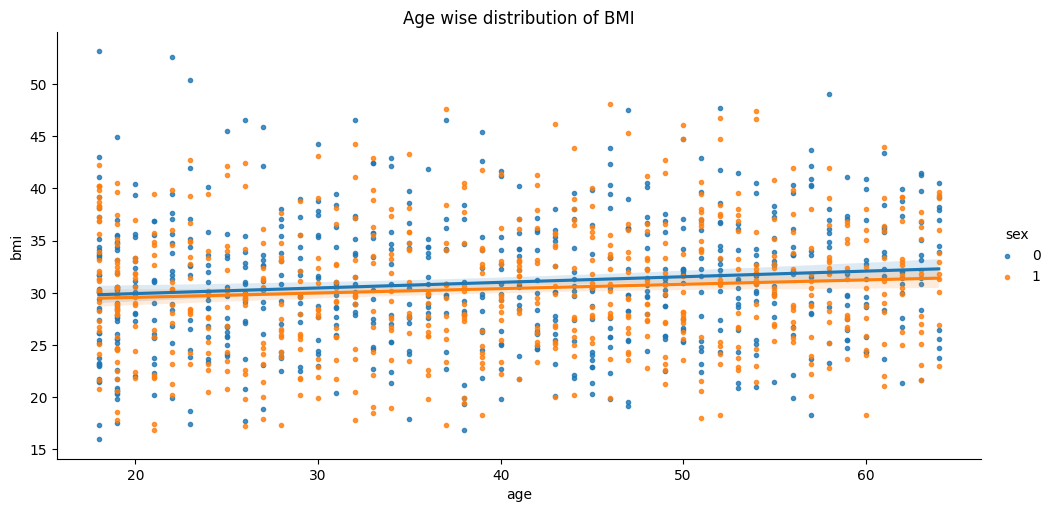

In [12]:
ax= plt.figure(figsize=(15,6))
sb.lmplot(x='age', y= 'bmi',data=df,markers='.',hue='sex',height=5,aspect=2)
plt.title('Age wise distribution of BMI')

**Тепловая карта**

In [13]:
heatmap=df.corr()
ax= plt.figure(figsize=(15,6))
sb.heatmap(heatmap,linewidths=1,linecolor='white',annot=True)

ValueError: could not convert string to float: 'southwest'

**Удаление столбца Region для регрессионного анализа**

In [ ]:
df.drop(['region'], axis =1, inplace=True)

**Импорт стандартного масштабатора для стандартизации значений**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

**Стандартизированные значения**

In [ ]:
scaled = scaler.fit_transform(df)
print(scaled)


**Разделение столбцов на зависимые значения "y" и независимые значения "x"**

In [ ]:
x=df[['age','bmi','children']]
y=df['charges']

**Использование Statsmodels для нахождения линейной регрессии с использованием метода OLS**

In [ ]:
x1= sm.add_constant(x)
results = sm.OLS(y,x1)

In [ ]:
model=results.fit()
model.summary()

**Преобразование столбца в 2D**

In [ ]:
xs =df['smoker']
xs1=xs.values.reshape(-1,1)
#y=y.values.reshape(-1,1)

**Импорт разделения обучающего теста для разделения на обучающий и тестовый наборы в Scikit Learn**

In [ ]:
from sklearn.model_selection import train_test_split

**Обучение : 70%
Тестирование : 30%**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xs1, y, test_size=0.3)

**Импорт линейной регрессии**

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

**Подгонка и прогнозирование данных**

In [ ]:
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

**Определение значения R в квадрате**

In [ ]:
from sklearn.metrics import r2_score
r2=(r2_score(y_test,pred))
r2

**Вывод :**

1. Данные значимы, поскольку значение r в квадрате >0,5
2. Таким образом, счета курильщиков несколько выше, но эти расходы могут быть вызваны не проблемами со здоровьем, вызванными курением 
3. При множественной регрессии с использованием Statsmodels переменные возраст, имт и дети остаются значимыми, поскольку значение p меньше 0,05